In [2]:
import os
import sys
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="7";


%load_ext autoreload
%autoreload 2
from CW import CW
from FGSM import FGSM
from OPT_attack import OPT_attack
from OPT_attack_sign_SGD_batch import OPT_attack_sign_SGD
from OPT_attack_sign_SGD_lf import OPT_attack_sign_SGD_lf
from OPT_attack_lf import OPT_attack_lf
from models import PytorchModel
import torch
import torchvision.models as models
from allmodels import MNIST, load_model, load_mnist_data, load_cifar10_data, CIFAR10, IMAGENET, load_imagenet_data
import os
import numpy as np
import matplotlib.pyplot as plt

Loading ImageNet validation dataset.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


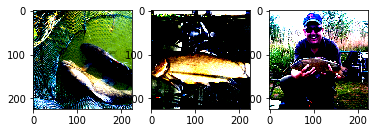

In [3]:
net = models.__dict__["resnet50"](pretrained=True)
net.cuda()
net = torch.nn.DataParallel(net, device_ids=[0])
net.eval()
model = net.module if torch.cuda.is_available() else net
amodel = PytorchModel(model, bounds=[-1,1], num_classes=1000)

train_loader, test_loader, train_dataset, test_dataset = load_imagenet_data()

X0, Y0 = None, None
X1, Y1 = None, None
X2, Y2 = None, None

for i, (xi,yi) in enumerate(test_loader):
    if i==0:
        X0, Y0 = xi, yi
    if i==1:
        X1, Y1 = xi, yi
    if i==6:
        X2, Y2 = xi, yi
    if i==10:
        break

def plot_adv(X, adv):
    plt.subplot(1,2,1)
    plt.imshow(np.transpose(X[0].numpy(), (1, 2, 0)))
    plt.subplot(1,2,2)
    plt.imshow(np.transpose(adv.cpu()[0].numpy(), (1, 2, 0)))
    plt.show()


# Plot the sample images
plt.subplot(1,3,1)
plt.imshow(np.transpose(X0[0].numpy(), (1,2,0)))
plt.subplot(1,3,2)
plt.imshow(np.transpose(X1[0].numpy(), (1, 2, 0)))
plt.subplot(1,3,3)
plt.imshow(np.transpose(X2[0].numpy(), (1, 2, 0)))
plt.show()

In [4]:
x, y = X2, Y2
seed = 10
target = 4

### UNTARGETED

In [6]:
attack = OPT_attack_lf(amodel)
adv, dist = attack(x.cuda(), y.cuda(), seed=seed)
plot_adv(x, adv)

Searching for the initial direction on 100 random directions: 
--------> Found distortion 2.2329
--------> Found distortion 1.9441
--------> Found distortion 1.8785
--------> Found distortion 1.6061
==========> Found best distortion 1.6061 in 3.3039 seconds using 269 queries
Iteration  10 distortion 1.244449 num_queries 1423
Iteration  20 distortion 1.103924 num_queries 2940
Iteration  30 distortion 1.071715 num_queries 4432
Iteration  40 distortion 1.015585 num_queries 5904
Iteration  50 distortion 0.999777 num_queries 7540
Iteration  60 distortion 0.988399 num_queries 9390
Iteration  70 distortion 0.981964 num_queries 11126
Iteration  80 distortion 0.968179 num_queries 12911
Iteration  90 distortion 0.953890 num_queries 15158
Iteration 100 distortion 0.948775 num_queries 17334
Iteration 110 distortion 0.942430 num_queries 19571


KeyboardInterrupt: 

In [21]:
attack = OPT_attack_sign_SGD_lf(amodel)
adv_sign, dist_sign = attack(x.cuda(), y.cuda(), seed=seed)
plot_adv(x, adv_sign)

Searching for the initial direction on 100 random directions: 
--------> Found distortion 2.2329
--------> Found distortion 1.9441
--------> Found distortion 1.8785
--------> Found distortion 1.6061
==========> Found best distortion 1.6061 in 3.4669 seconds using 269 queries
Iteration   1 distortion 1.344478 num_queries 601
Iteration   6 distortion 0.999316 num_queries 1945
Iteration  11 distortion 0.846363 num_queries 3183
Iteration  16 distortion 0.686507 num_queries 4603
Iteration  21 distortion 0.604599 num_queries 5776
Iteration  26 distortion 0.533458 num_queries 7087
Iteration  31 distortion 0.466198 num_queries 8371


KeyboardInterrupt: 

In [5]:
attack = OPT_attack_sign_SGD_lf(amodel)
adv_sign, dist_sign = attack(x.cuda(), y.cuda(), seed=seed)
plot_adv(x, adv_sign)

Searching for the initial direction on 100 random directions: 
--------> Found distortion 2.2329
--------> Found distortion 1.9441
--------> Found distortion 1.8785
--------> Found distortion 1.6061
==========> Found best distortion 1.6061 in 3.5643 seconds using 269 queries
Iteration   1 distortion 1.344956 num_queries 601
Iteration   6 distortion 1.025527 num_queries 1961
Iteration  11 distortion 0.831971 num_queries 3198
Iteration  16 distortion 0.676306 num_queries 4602
Iteration  21 distortion 0.580459 num_queries 5857
Iteration  26 distortion 0.518462 num_queries 7090
Iteration  31 distortion 0.494629 num_queries 8248
Iteration  36 distortion 0.450903 num_queries 9461
Iteration  41 distortion 0.413719 num_queries 10636


KeyboardInterrupt: 

### TARGETED

Targeted attack - Source: 0 and Target: 4 Seed: 10
Searching for the initial direction on 40 samples: 
--------> Found distortion 636.1729
--------> Found distortion 616.3617
--------> Found distortion 431.4885
--------> Found distortion 372.0425
--------> Found distortion 358.7660
==========> Found best distortion 358.7660 in 8.6524 seconds using 409 queries
Iteration  10 distortion 315.8774 num_queries 2485
Iteration  20 distortion 272.5600 num_queries 5041
Iteration  30 distortion 236.1499 num_queries 7649
Iteration  40 distortion 198.6440 num_queries 10849
Iteration  50 distortion 176.1550 num_queries 14129
Iteration  60 distortion 173.8013 num_queries 17925


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Iteration  70 distortion 173.8013 num_queries 25205
Stopping criteria reached

Adversarial Example Found Successfully: distortion 173.8013 target 4 queries 25614 
Time: 340.3647 seconds


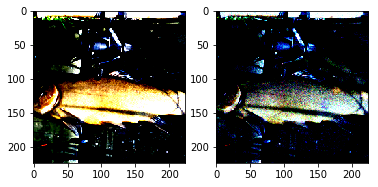

In [7]:
attack = OPT_attack(amodel, train_dataset=train_dataset)
adv, dist = attack(x.cuda(), y.cuda(), target=target*torch.ones(1, dtype=torch.long).cuda(), seed=seed)
plot_adv(x, adv)

In [10]:
attack = OPT_attack_sign_SGD(amodel, train_dataset=train_dataset)
adv, dist = attack(x.cuda(), y.cuda(), target=target*torch.ones(1, dtype=torch.long).cuda(), seed=seed)
plot_adv(x, adv)

Targeted attack - Source: 0 and Target: 4
Searching for the initial direction on 40 samples: 
--------> Found distortion 636.1729
--------> Found distortion 616.3617
--------> Found distortion 431.4885
--------> Found distortion 372.0425
--------> Found distortion 358.7660
==========> Found best distortion 358.7660 in 9.5559 seconds using 409 queries
Iteration   1 distortion 320.8811 num_queries 711
Iteration   6 distortion 223.0403 num_queries 1944
Iteration  11 distortion 134.0857 num_queries 3182
Iteration  16 distortion 103.0878 num_queries 4376
Iteration  21 distortion 71.8586 num_queries 5688
Iteration  26 distortion 66.4447 num_queries 7278
Iteration  31 distortion 50.8194 num_queries 9101
Iteration  36 distortion 40.8912 num_queries 10842
Iteration  41 distortion 38.2770 num_queries 12375
Iteration  46 distortion 33.6594 num_queries 14080
Iteration  51 distortion 25.7580 num_queries 15633
Iteration  56 distortion 16.3428 num_queries 17382
Iteration  61 distortion 12.9750 num_qu

KeyboardInterrupt: 

Targeted attack - Source: 6 and Target: 4
Searching for the initial direction on 100 samples: 
--------> Found distortion 5.2690
--------> Found distortion 4.2136


/home/simranjit/blackbox/attackbox-master/models.py:26: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True) # ?? not supported by latest pytorch


==========> Found best distortion 4.2136 in 1.7316 seconds using 1140 queries
Iteration   1 distortion 3.6252 num_queries 2012
Iteration   6 distortion 0.6060 num_queries 4729
Iteration  11 distortion 0.3934 num_queries 6035
Iteration  16 distortion 0.3095 num_queries 7480
Iteration  21 distortion 0.2623 num_queries 8815
Iteration  26 distortion 0.2354 num_queries 9993
Iteration  31 distortion 0.2214 num_queries 11234
Success: stopping threshold reached

Adversarial Example Found Successfully: distortion 0.2214 target 4 queries 11234 LS queries 3894 
Time: 16.7447 seconds


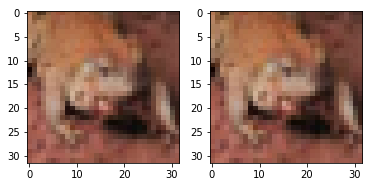

In [19]:
attack = OPT_attack_sign_SGD(amodel, train_dataset=train_dataset)
adv, dist = attack(x.cuda(), y.cuda(), target=target*torch.ones(1, dtype=torch.long).cuda(), seed=seed,
                  svm=True)
plot_adv(x, adv)